In [76]:
import pandas as pd 
import numpy as np 
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV
%matplotlib inline
sns.set_style('darkgrid')
pd.set_option('display.max_columns', None)

In [77]:
## read the data file

df = pd.read_csv('heart.csv')

In [78]:
## display first five row of data 

df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

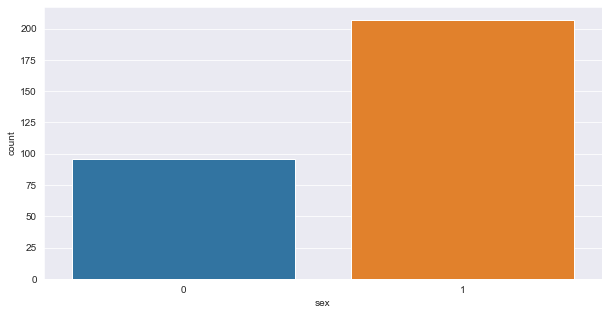

In [79]:
## value counts of column age

plt.figure(figsize=(10, 5))
sns.countplot(x='sex', data=df);

<Figure size 720x720 with 0 Axes>

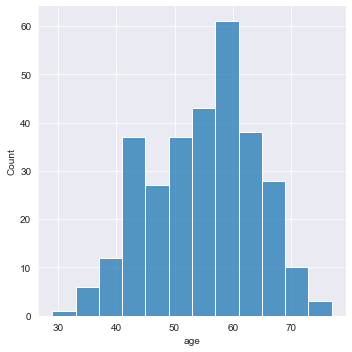

In [80]:
## distribution plot of column age

plt.figure(figsize=(10, 10))
sns.displot(df['age'])

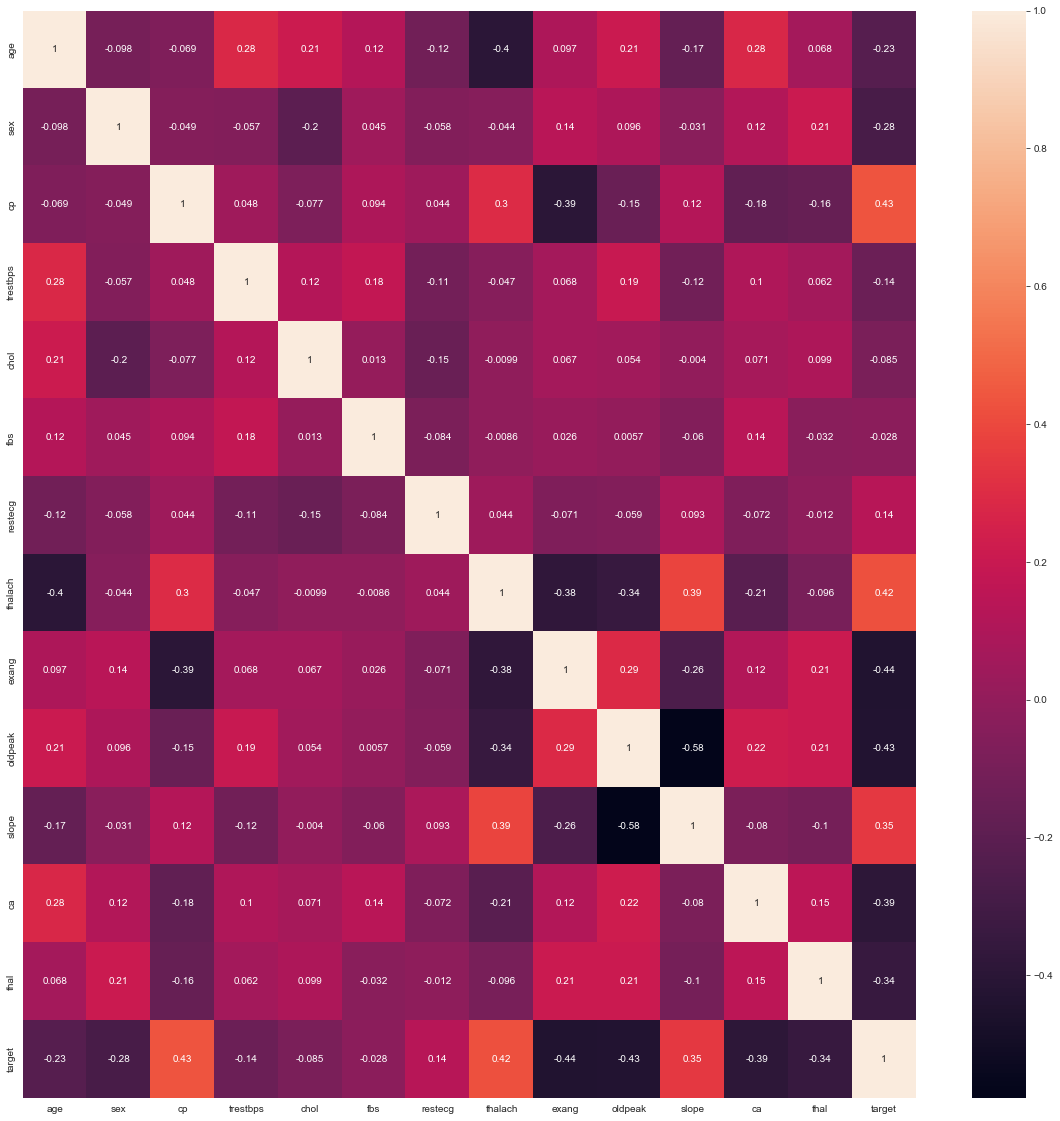

In [81]:
## correlation of features

plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(), annot=True)

In [82]:
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

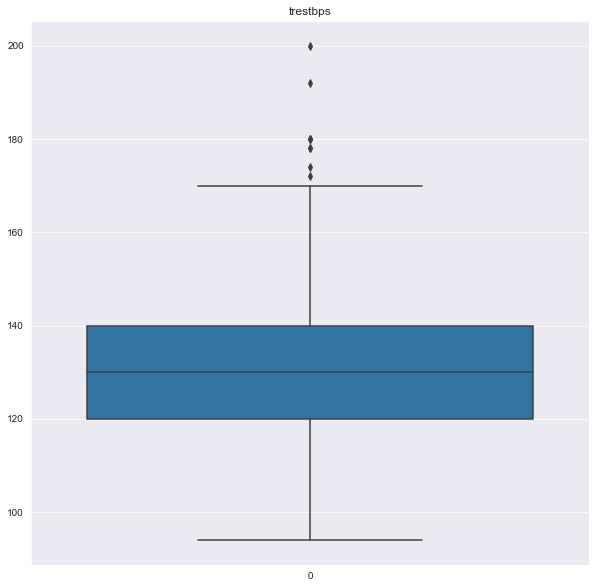

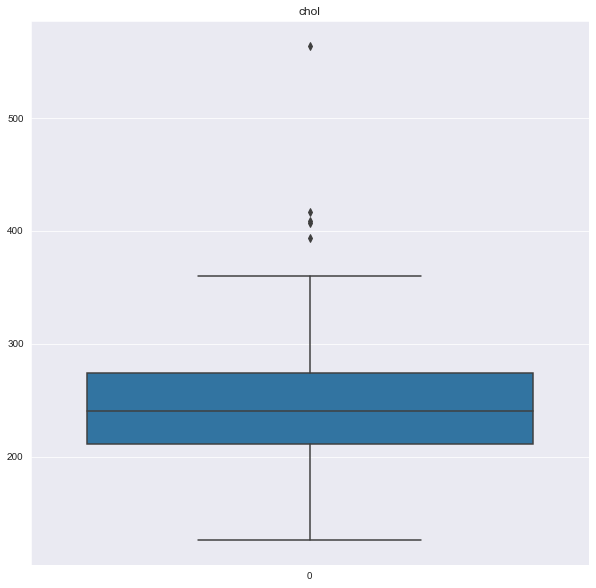

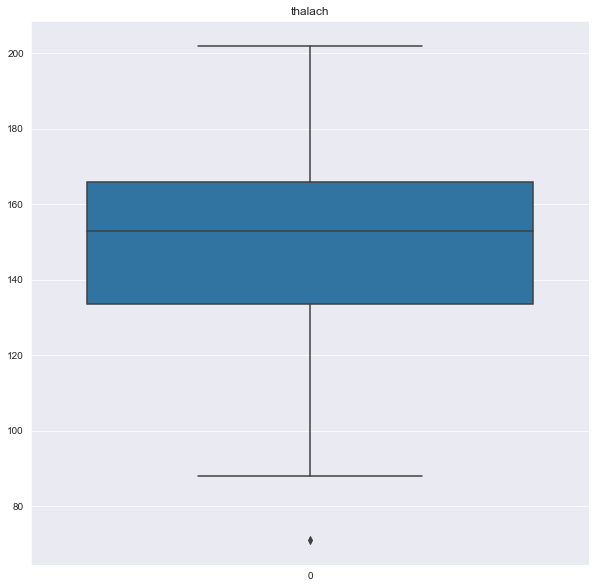

In [83]:
## checking outliers

for f in ['trestbps', 'chol', 'thalach']:
    plt.figure(figsize=(10, 10))
    sns.boxplot(df[f])
    plt.title(f)

<Figure size 720x720 with 0 Axes>

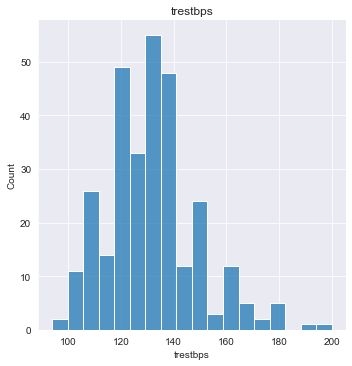

<Figure size 720x720 with 0 Axes>

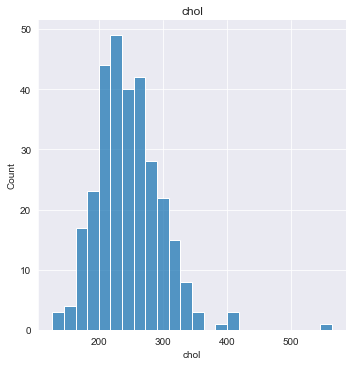

<Figure size 720x720 with 0 Axes>

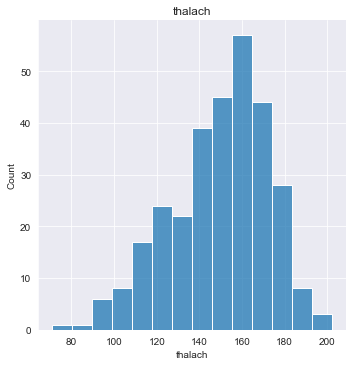

In [84]:
for f in ['trestbps', 'chol', 'thalach']:
    plt.figure(figsize=(10, 10))
    sns.displot(df[f])
    plt.title(f)

In [85]:
## most of the columns are following gaussian distribution, so we are going to remove outliers with 3rd std

def remove_outliers(df, feature):
    lower_bound = df[feature].mean() - (3 * df[feature].std())
    upper_bound = df[feature].mean() + (3 * df[feature].std())
    
    df.loc[df[feature] < lower_bound, feature] = lower_bound
    df.loc[df[feature] > upper_bound, feature] = upper_bound

In [86]:
for f in ['trestbps', 'chol', 'thalach', 'age']:
    remove_outliers(df, f)

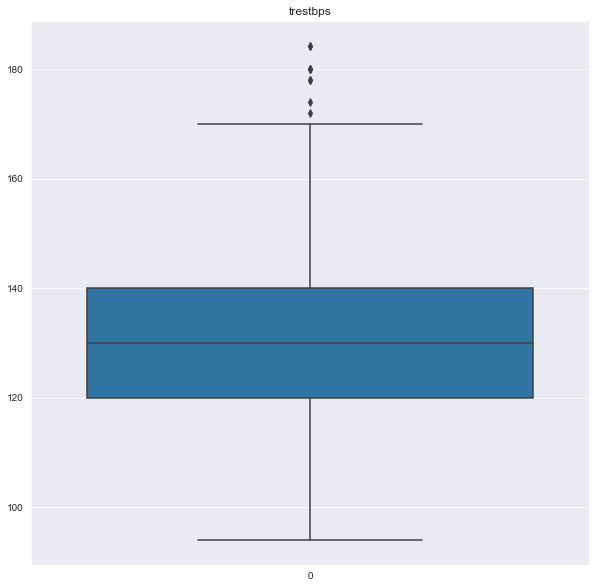

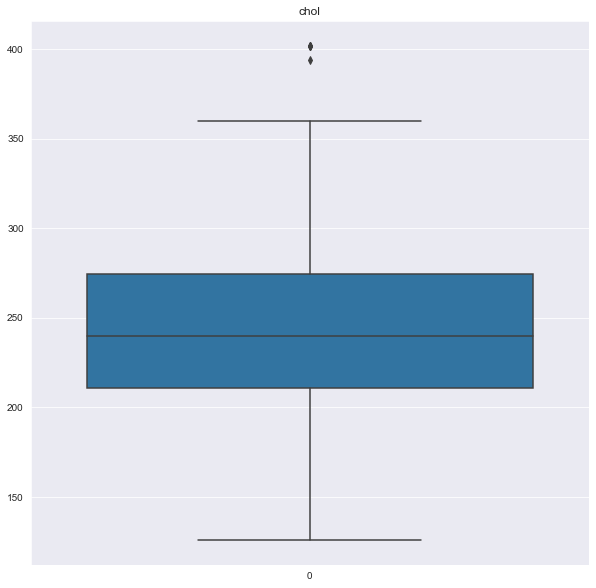

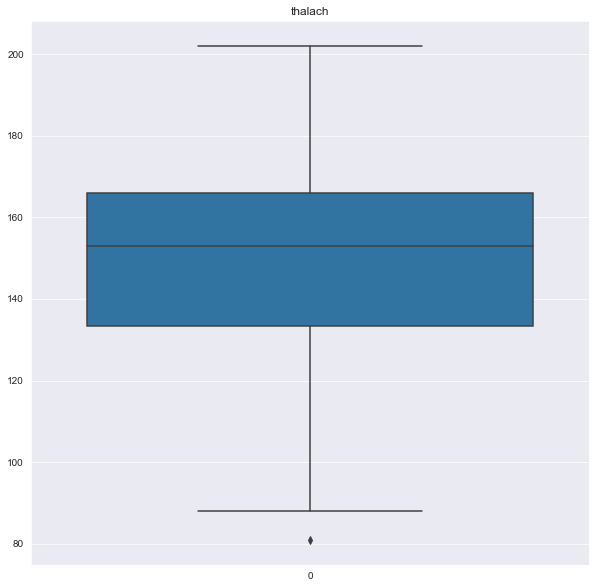

In [87]:
for f in ['trestbps', 'chol', 'thalach']:
    plt.figure(figsize=(10, 10))
    sns.boxplot(df[f])
    plt.title(f)

In [88]:
remove_outliers(df, 'age')

In [89]:
## dependent and independent features

X = df.iloc[:, :-1]
y = df.iloc[:, -1]
print(y.value_counts())

## converting X and y into numpy array's

X = X.values
y = y.values

1    165
0    138
Name: target, dtype: int64


In [90]:
## scaling the data 

sc = StandardScaler()
X = sc.fit_transform(X)

In [91]:
## splitting the dataset into train and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [92]:
## logistic Regression
lg = LogisticRegression()
lg.fit(X_train, y_train)

LogisticRegression()

In [93]:
preds = lg.predict(X_test)
pd.DataFrame({'Acutual': y_test, 'Predicted': preds})

Acutual  Predicted
0         0          0
1         0          1
2         1          1
3         0          0
4         1          1
..      ...        ...
71        1          1
72        0          1
73        1          1
74        0          0
75        1          1

[76 rows x 2 columns]

------------------------------------------------Accuracy Score-------------------------------------------------------
0.8421052631578947
------------------------------------------Classfication Report--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.85      0.80      0.82        35
           1       0.84      0.88      0.86        41

    accuracy                           0.84        76
   macro avg       0.84      0.84      0.84        76
weighted avg       0.84      0.84      0.84        76

----------------------------------------------------------Confusion Matrix---------------------------------------------


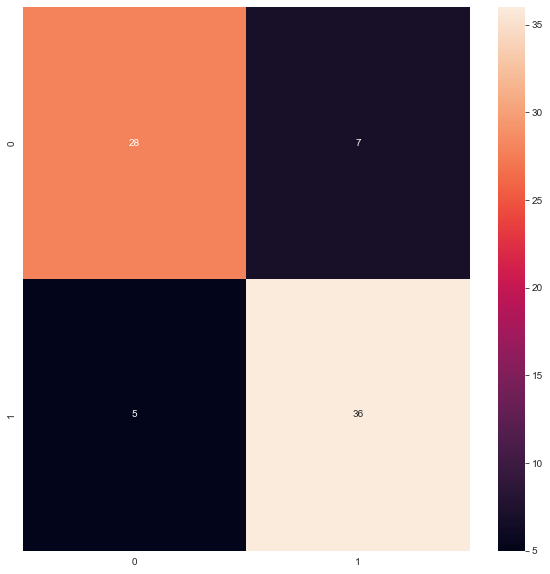

In [94]:
print("------------------------------------------------Accuracy Score-------------------------------------------------------")
print(accuracy_score(y_test, preds))

print("------------------------------------------Classfication Report--------------------------------------------------------")
print(classification_report(y_test, preds))

print("----------------------------------------------------------Confusion Matrix---------------------------------------------")
plt.figure(figsize=(10, 10))
sns.heatmap(confusion_matrix(y_test, preds), annot=True);

In [95]:
targetcolumn=df["target"]
print (targetcolumn)

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64


In [96]:
rfc=RandomForestClassifier(n_estimators=10)
rfc.fit(X_train, y_train)
ypred=rfc.predict(X_test)
#y_pred_cv=cross_val_predict(rfc,X,y,cv=5)
#y_pred_cv

------------------------------------------------Accuracy Score-------------------------------------------------------
0.8289473684210527
------------------------------------------Classfication Report--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.81      0.83      0.82        35
           1       0.85      0.83      0.84        41

    accuracy                           0.83        76
   macro avg       0.83      0.83      0.83        76
weighted avg       0.83      0.83      0.83        76

----------------------------------------------------------Confusion Matrix---------------------------------------------


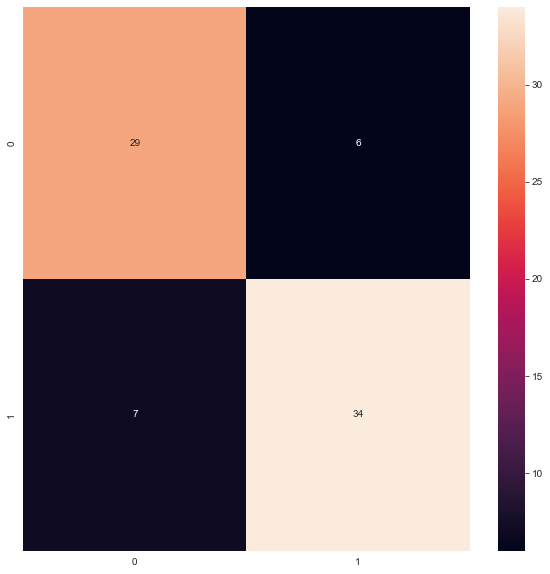

In [97]:
print("------------------------------------------------Accuracy Score-------------------------------------------------------")
print(accuracy_score(y_test, ypred))

print("------------------------------------------Classfication Report--------------------------------------------------------")
print(classification_report(y_test,ypred))

print("----------------------------------------------------------Confusion Matrix---------------------------------------------")
plt.figure(figsize=(10, 10))
sns.heatmap(confusion_matrix(y_test, ypred), annot=True)

In [98]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

In [99]:
prediction = knn.predict(X_test)
print(prediction)

[0 0 1 0 1 1 1 0 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0 0 1 0 1
 1 1 1 1 1 1 1 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 1 0 1 1 1 1 0 1
 0 1]


------------------------------------------------Accuracy Score-------------------------------------------------------
0.881578947368421
------------------------------------------Classfication Report--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.84      0.91      0.88        35
           1       0.92      0.85      0.89        41

    accuracy                           0.88        76
   macro avg       0.88      0.88      0.88        76
weighted avg       0.88      0.88      0.88        76

----------------------------------------------------------Confusion Matrix---------------------------------------------


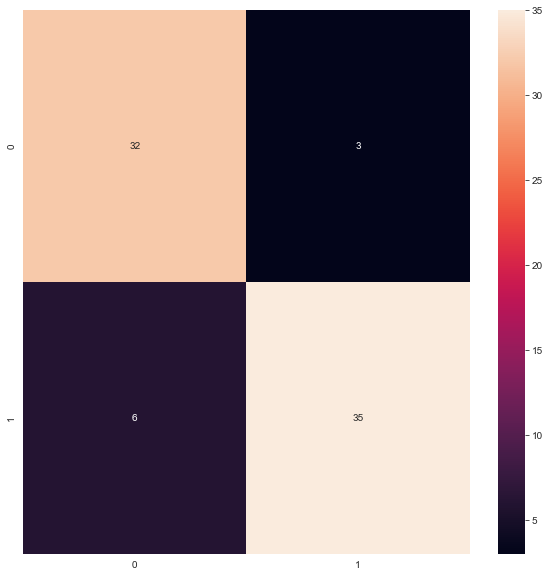

In [100]:
print("------------------------------------------------Accuracy Score-------------------------------------------------------")
print(accuracy_score(y_test, prediction))

print("------------------------------------------Classfication Report--------------------------------------------------------")
print(classification_report(y_test, prediction))

print("----------------------------------------------------------Confusion Matrix---------------------------------------------")
plt.figure(figsize=(10, 10))
sns.heatmap(confusion_matrix(y_test, prediction), annot=True)

In [101]:
model = SVC(kernel='sigmoid', probability= True)
model.fit(X_train, y_train)

SVC(kernel='sigmoid', probability=True)

In [102]:
y_pred= model.predict(X_test)

------------------------------------------------Accuracy Score-------------------------------------------------------
0.881578947368421
------------------------------------------Classfication Report--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.86      0.87        35
           1       0.88      0.90      0.89        41

    accuracy                           0.88        76
   macro avg       0.88      0.88      0.88        76
weighted avg       0.88      0.88      0.88        76

----------------------------------------------------------Confusion Matrix---------------------------------------------


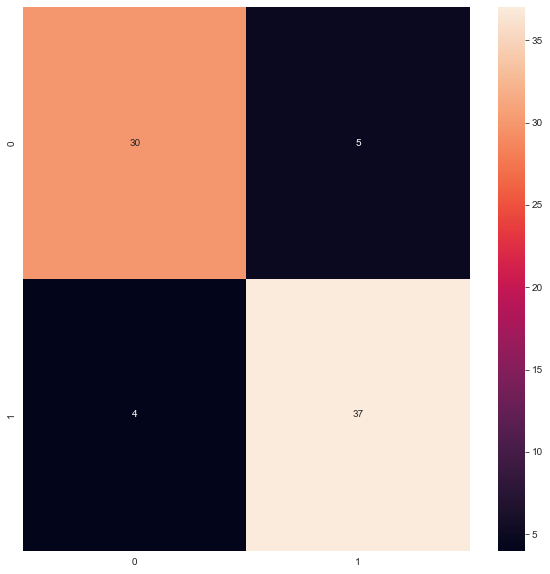

In [103]:
print("------------------------------------------------Accuracy Score-------------------------------------------------------")
print(accuracy_score(y_test,y_pred))

print("------------------------------------------Classfication Report--------------------------------------------------------")
print(classification_report(y_test, y_pred))

print("----------------------------------------------------------Confusion Matrix---------------------------------------------")
plt.figure(figsize=(10, 10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

In [104]:
#Performing Grid Search and hyper paramter tuning
log_clf_ens = LogisticRegression()
rnd_clf_ens = RandomForestClassifier(n_estimators=10) 
knn_clf_ens = KNeighborsClassifier(n_neighbors=3)
sv_clf_ens = SVC(kernel='sigmoid', probability=True)



voting_clf_grid_search = VotingClassifier(
    estimators=[('lr', log_clf_ens), ('rf', rnd_clf_ens), ('knn',knn_clf_ens), ('sv',sv_clf_ens)],
    voting='soft')

param_grid = [
    {
        "rf__n_estimators":[10],
        "knn__n_neighbors":[3],
        "sv__kernel":["sigmoid"],
        "sv__probability":[True]
    }]

grid_search = GridSearchCV(voting_clf_grid_search, param_grid, cv=4, scoring="neg_mean_squared_error")

#Run the grid search
grid_search.fit(X_train, y_train)
#Get the best hyperparameter values
grid_search.best_params_
#Get the best estimator
grid_search.best_estimator_

cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score))

0.4451422571186448


In [105]:
# Evaluate model on the test Set

final_model = grid_search.best_estimator_


from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score



y_test_predict = final_model.predict(X_test)

confusion_matrix(y_test, y_test_predict)
final_accuracy = accuracy_score(y_test, y_test_predict)
final_precision = precision_score(y_test, y_test_predict, average='weighted')
final_recall = recall_score(y_test, y_test_predict, average='weighted')
final_f1_score = f1_score(y_test, y_test_predict, average='weighted')


print("Final Accuracy: ", final_accuracy)
print("Final Precision: ", final_precision)
print("Final Recall: ", final_recall)
print("Final F1 Score: ", final_f1_score)

Final Accuracy:  0.881578947368421
Final Precision:  0.8815973757924221
Final Recall:  0.881578947368421
Final F1 Score:  0.881434203633757
